# EDA

### Some initial EDA for my beer recommender

I am only going to probably do look at the data and do some basic plots; these dependencies do that

In [37]:
# Data manipulation
import pandas as pd
import collections
import re
from functools import reduce

# Numerical Operations
import numpy as np

# Machine Learning tools
from sklearn.feature_extraction.text import CountVectorizer
# import nltk
# from nltk.corpus import stopwords
# from nltk.stem.snowball import SnowballStemmer

# Plotting
import matplotlib.pyplot as plt

%matplotlib inline

In [57]:
beer_reviews = pd.read_csv("../datasets/socialmediadata-beeradvocate/data/beer_reviews.csv")

In [58]:
beer_reviews.shape

(1586614, 13)

In [59]:
beer_reviews.head()

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883


In [60]:
beer_reviews.isnull().sum()

brewery_id                0
brewery_name             15
review_time               0
review_overall            0
review_aroma              0
review_appearance         0
review_profilename      348
beer_style                0
review_palate             0
review_taste              0
beer_name                 0
beer_abv              67785
beer_beerid               0
dtype: int64

In [61]:
beer_reviews.dtypes

brewery_id              int64
brewery_name           object
review_time             int64
review_overall        float64
review_aroma          float64
review_appearance     float64
review_profilename     object
beer_style             object
review_palate         float64
review_taste          float64
beer_name              object
beer_abv              float64
beer_beerid             int64
dtype: object

In [62]:
beer_reviews.describe()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
count,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.586614e+06,1.518829e+06,1.586614e+06
mean,3.130099e+03,1.224089e+09,3.815581e+00,3.735636e+00,3.841642e+00,3.743701e+00,3.792860e+00,7.042387e+00,2.171279e+04
std,5.578104e+03,7.654427e+07,7.206219e-01,6.976167e-01,6.160928e-01,6.822184e-01,7.319696e-01,2.322526e+00,2.181834e+04
min,1.000000e+00,8.406720e+08,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e-02,3.000000e+00
25%,1.430000e+02,1.173224e+09,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,3.500000e+00,5.200000e+00,1.717000e+03
50%,4.290000e+02,1.239203e+09,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.000000e+00,6.500000e+00,1.390600e+04
75%,2.372000e+03,1.288568e+09,4.500000e+00,4.000000e+00,4.000000e+00,4.000000e+00,4.500000e+00,8.500000e+00,3.944100e+04
max,2.800300e+04,1.326285e+09,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.000000e+00,5.770000e+01,7.731700e+04


In [65]:
review_counts_by_user = beer_reviews.groupby("review_profilename")[['review_overall']].count()
review_counts_by_user.sort_values(by="review_overall", ascending=False).head()
rc_by_user_gt_100 =  review_counts_by_user.where(review_counts_by_user > 100)
users_w_100_reviews =  list(rc_by_user_gt_100.dropna().sort_values(by="review_overall",ascending=False).index)
users_w_100_reviews

['northyorksammy',
 'BuckeyeNation',
 'mikesgroove',
 'Thorpe429',
 'womencantsail',
 'NeroFiddled',
 'ChainGangGuy',
 'brentk56',
 'Phyl21ca',
 'WesWes',
 'oberon',
 'feloniousmonk',
 'akorsak',
 'BEERchitect',
 'Gueuzedude',
 'jwc215',
 'russpowell',
 'TheManiacalOne',
 'Gavage',
 'zeff80',
 'Mora2000',
 'tempest',
 'Wasatch',
 'WVbeergeek',
 'drabmuh',
 'Halcyondays',
 'weeare138',
 'glid02',
 'Viggo',
 'ppoitras',
 'jdhilt',
 'barleywinefiend',
 'Bighuge',
 'Jason',
 'wl0307',
 'Gusler',
 'emerge077',
 'Billolick',
 'smcolw',
 'rhoadsrage',
 'DrJay',
 'Zorro',
 'TMoney2591',
 'MasterSki',
 'Kegatron',
 'Knapp85',
 'Dogbrick',
 'johnmichaelsen',
 'tavernjef',
 'Georgiabeer',
 'plaid75',
 'Derek',
 'RoyalT',
 'biegaman',
 'beerthulhu',
 'woodychandler',
 'jpm30',
 'TheLongBeachBum',
 'jrallen34',
 'biboergosum',
 'francisweizen',
 'RblWthACoz',
 'cokes',
 'gford217',
 'corby112',
 'DoubleJ',
 'ZAP',
 'mothman',
 'TurdFurgison',
 'tpd975',
 'Beerandraiderfan',
 'LilBeerDoctor',
 'stcu

In [64]:
avg_by_beer_style = beer_reviews.groupby("beer_style")["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
avg_by_beer_style["counts"] = beer_reviews.groupby("beer_style").size()
avg_by_beer_style.sort_values(by="counts", ascending=False).head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,counts
beer_style,,,,,,
American IPA,3.965221,3.894103,3.968525,3.867476,3.922363,117586
American Double / Imperial IPA,3.998017,4.097782,4.078916,4.023128,4.091280,85977
American Pale Ale (APA),3.852306,3.657746,3.781610,3.684153,3.721423,63469
Russian Imperial Stout,4.023084,4.076576,4.210072,4.086922,4.149569,54129
American Double / Imperial Stout,4.029820,4.160665,4.163633,4.098669,4.187230,50705


In [63]:
avg_by_brewery_name = beer_reviews.groupby("brewery_name")["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
avg_by_brewery_name["counts"] = beer_reviews.groupby("brewery_name").size()
avg_by_brewery_name.sort_values(by="counts", ascending=False).head()

,review_overall,review_aroma,review_appearance,review_palate,review_taste,counts
brewery_name,,,,,,
Boston Beer Company (Samuel Adams),3.689522,3.593107,3.809299,3.641365,3.647171,39444
Dogfish Head Brewery,3.836047,3.916945,3.943763,3.895860,3.971350,33839
Stone Brewing Co.,4.040268,4.094644,4.152422,4.073550,4.150608,33066
Sierra Nevada Brewing Co.,4.056207,3.896682,4.096971,3.965184,4.028764,28751
"Bell's Brewery, Inc.",3.973066,3.938331,3.983724,3.965484,4.011572,25191


In [66]:
avg_beers_by_brewery_name = beer_reviews.groupby(["brewery_name","beer_style"])["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
avg_beers_by_brewery_name["counts"] = beer_reviews.groupby(["brewery_name","beer_style"]).size()
avg_beers_by_brewery_name.sort_values(by="counts", ascending=False).head(10)

,,review_overall,review_aroma,review_appearance,review_palate,review_taste,counts
brewery_name,beer_style,,,,,,
Sierra Nevada Brewing Co.,American IPA,4.150955,4.026592,4.212527,4.042834,4.133015,9420
Stone Brewing Co.,American Strong Ale,4.054657,4.143713,4.251497,4.155052,4.253727,7849
Dogfish Head Brewery,American Double / Imperial IPA,3.953045,4.101375,4.128815,4.064571,4.160707,7635
Founders Brewing Company,American Double / Imperial Stout,4.399412,4.489618,4.380411,4.446033,4.572968,5105
Unibroue,Belgian Strong Dark Ale,4.098937,4.109987,4.117807,4.074437,4.232694,4796
Anheuser-Busch,Light Lager,2.468323,1.894672,2.119208,2.043989,1.966197,4467
Stone Brewing Co.,American Double / Imperial IPA,4.071805,4.237353,4.125509,4.113882,4.232079,4171
Guinness Ltd.,Irish Dry Stout,3.686925,3.356416,4.124939,3.503632,3.472276,4130
Dogfish Head Brewery,American IPA,4.050170,3.922309,3.947151,3.930102,4.006941,4106


In [67]:
avg_by_beer_name = beer_reviews.groupby(["beer_name","brewery_name"])["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
avg_by_beer_name["counts"] = beer_reviews.groupby(["beer_name","brewery_name"]).size()
avg_by_beer_name.sort_values(by="counts", ascending=False).head()

,,review_overall,review_aroma,review_appearance,review_palate,review_taste,counts
beer_name,brewery_name,,,,,,
90 Minute IPA,Dogfish Head Brewery,4.145745,4.213526,4.192097,4.181763,4.325988,3290
Old Rasputin Russian Imperial Stout,North Coast Brewing Co.,4.174221,4.198650,4.373995,4.231758,4.342173,3111
Sierra Nevada Celebration Ale,Sierra Nevada Brewing Co.,4.168667,4.082333,4.225167,4.076000,4.190000,3000
Two Hearted Ale,"Bell's Brewery, Inc.",4.329729,4.266496,4.153959,4.138746,4.318915,2728
Arrogant Bastard Ale,Stone Brewing Co.,4.078402,4.119268,4.296413,4.143121,4.278846,2704


In [68]:
user_reviews = beer_reviews.groupby(["review_profilename"])["review_overall","review_aroma","review_appearance","review_palate","review_taste"].mean()
user_reviews["counts"] = beer_reviews.groupby(["review_profilename"]).size()
user_reviews.counts.mean()

47.511486506724175

In [69]:
beer_reviews.corr()

,brewery_id,review_time,review_overall,review_aroma,review_appearance,review_palate,review_taste,beer_abv,beer_beerid
brewery_id,1.000000,0.220954,-0.009331,0.019069,0.001993,-0.000499,-0.002672,0.063731,0.424097
review_time,0.220954,1.000000,0.028724,0.067453,0.058233,0.057247,0.044498,0.144885,0.461535
review_overall,-0.009331,0.028724,1.000000,0.616013,0.501732,0.701914,0.789816,0.138512,0.003794
review_aroma,0.019069,0.067453,0.616013,1.000000,0.561029,0.616947,0.716776,0.332570,0.077669
review_appearance,0.001993,0.058233,0.501732,0.561029,1.000000,0.566634,0.546980,0.263941,0.054794
review_palate,-0.000499,0.057247,0.701914,0.616947,0.566634,1.000000,0.734135,0.286711,0.044510
review_taste,-0.002672,0.044498,0.789816,0.716776,0.546980,0.734135,1.000000,0.290827,0.030402
beer_abv,0.063731,0.144885,0.138512,0.332570,0.263941,0.286711,0.290827,1.000000,0.201818
beer_beerid,0.424097,0.461535,0.003794,0.077669,0.054794,0.044510,0.030402,0.201818,1.000000


In [70]:
beer_reviews.groupby("beer_name")["review_overall"].mean().sort_values().head()

beer_name
Vlaamsch Wit                                 1.0
Bourbon Barrel Aged Coffee Imperial Stout    1.0
Dansk Fadøl                                  1.0
ESP (Extra Special Porter)                   1.0
Permyakov Lyegkoye Pivo                      1.0
Name: review_overall, dtype: float64

In [94]:
reviews_by_style = {style: beer_reviews[beer_reviews.beer_style == style] for style in beer_reviews.beer_style.unique()}
    

This was a mistake but I thought it looked cool

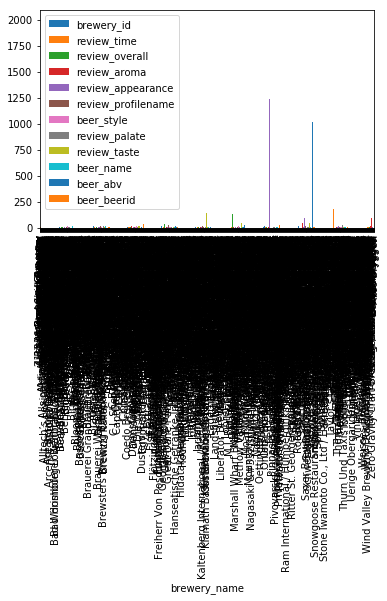

In [93]:
reviews_by_style['Hefeweizen'].groupby('brewery_name').count().plot(kind="bar")

In [ ]:
reviews_by_style['Hefeweizen'].groupby('brewery_name').count().plot(kind="bar")

In [ ]:
import seaborn as sns
plt.figure(figsize=(12,12))
beer_reviews.drop(columns=["brewery_id","review_time","beer_abv","beer_beerid"], inplace=True)
sns.heatmap(beer_reviews.corr()[(beer_reviews.corr() > .5) | (beer_reviews.corr() < -.5)], annot=True)
plt.savefig("../presentation/public/images/heatmap.png", bbox_inches='tight')

In [17]:
text_reviews = pd.read_csv("../datasets/petergensler-beer-advocate-reviews/BeerAdvocate-000.csv")

In [48]:
text_reviews.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_profileName,review_taste,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206


In [49]:
text_reviews.shape

(528870, 13)

In [50]:
text_reviews.isnull().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_aroma              0
review_overall            0
review_palate             0
review_profileName      115
review_taste              0
review_text             119
review_time               0
dtype: int64

In [51]:
corpus = [text[0] for text in text_reviews[['review_text']].dropna().values.tolist()]

In [ ]:
count_vect = CountVectorizer(stop_words='english')
word_freq = count_vect.fit_transform(corpus)

In [ ]:
vocab = count_vect.vocabulary_
vocab